In [2]:
from sklearn.datasets._samples_generator import make_blobs
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report


%matplotlib inline
import matplotlib.pyplot as plt

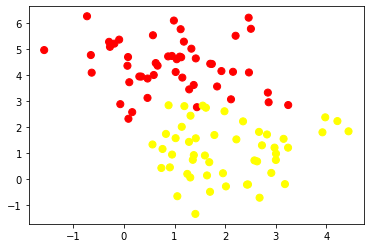

In [8]:
X,y = make_blobs(n_samples=100, centers=2, random_state=0 , cluster_std=1) # n_nsample = 50,cluster_std=0.6
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='autumn')

In [4]:
clf = SVC()
y_predict = cross_val_predict(clf,X,y,cv=3)

clf.fit(X,y)


SVC()

In [5]:
#evaluate
print(f'accuracy score: {accuracy_score(y,y_predict)}')
print(f'\nconfusion matrix:\n {confusion_matrix(y,y_predict)}')
print(f'\nclassification report:\n {classification_report(y,y_predict)}')

accuracy score: 0.93

confusion matrix:
 [[47  3]
 [ 4 46]]

classification report:
               precision    recall  f1-score   support

           0       0.92      0.94      0.93        50
           1       0.94      0.92      0.93        50

    accuracy                           0.93       100
   macro avg       0.93      0.93      0.93       100
weighted avg       0.93      0.93      0.93       100



In [6]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

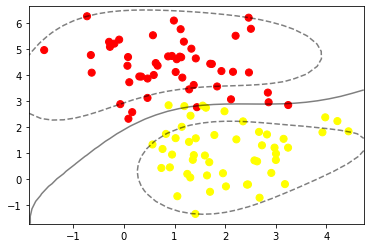

In [7]:
import numpy as np

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)